In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("DataMix.csv", sep = ';')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2011 entries, 0 to 2010
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   NO      2011 non-null   int64 
 1   HARGA   2011 non-null   int64 
 2   LB      2011 non-null   int64 
 3   LT      2011 non-null   int64 
 4   KT      2011 non-null   int64 
 5   KM      2011 non-null   int64 
 6   GRS     2011 non-null   object
dtypes: int64(6), object(1)
memory usage: 110.1+ KB


<AxesSubplot:>

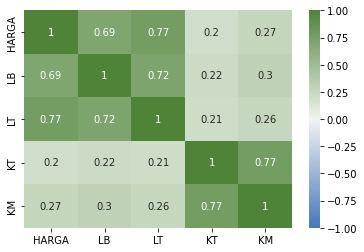

In [4]:
import seaborn as sb

korelasi = df.iloc[:,[1,2,3,4,5,6]].corr()
sb.heatmap(korelasi, 
            xticklabels = korelasi.columns,
            yticklabels = korelasi.columns,
            cmap = sb.diverging_palette(h_neg=250, h_pos=120, sep=3, as_cmap=True),
            vmin = -1,
            vmax = 1,
            annot = True
            )

In [5]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder 
label_encode = LabelEncoder()
df.loc[:,'GRS'] = label_encode.fit_transform(df.loc[:,'GRS'])
df

,NO,HARGA,LB,LT,KT,KM,GRS
0,1,3800000000,220,220,3,3,1
1,2,4600000000,180,137,4,3,0
2,3,3000000000,267,250,4,4,0
3,4,430000000,40,25,2,2,1
4,5,9000000000,400,355,6,5,0
...,...,...,...,...,...,...,...
2006,2007,16000000000,550,488,6,5,0
2007,2008,4500000000,270,209,4,4,0
2008,2009,29000000000,400,692,4,3,1
2009,2010,1700000000,140,102,4,3,1


In [6]:
df.columns.values

array(['NO', 'HARGA', 'LB', 'LT', 'KT', 'KM', 'GRS'], dtype=object)

In [32]:
for i in range(2,7):
    x = df.loc[:, df.columns.values[i]]
    y = df.loc[:, 'HARGA']
    print("Covariance of {} and {}".format('HARGA', df.columns.values[i]))
    print(np.cov(list(x), list(y))[0][1])

Covariance of HARGA and LB
4061933468486.8057
Covariance of HARGA and LT
5327089668205.516
Covariance of HARGA and KT
5870632885.77855
Covariance of HARGA and KM
7502007360.009331
Covariance of HARGA and GRS
-285111922.2110003


In [33]:
X = df[['LB', 'LT', 'KT', 'KM', 'GRS']]
y = df.HARGA

In [9]:
X

,LB,LT,KT,KM,GRS
0,220,220,3,3,1
1,180,137,4,3,0
2,267,250,4,4,0
3,40,25,2,2,1
4,400,355,6,5,0
...,...,...,...,...,...
2006,550,488,6,5,0
2007,270,209,4,4,0
2008,400,692,4,3,1
2009,140,102,4,3,1


In [10]:
y

0        3800000000
1        4600000000
2        3000000000
3         430000000
4        9000000000
           ...     
2006    16000000000
2007     4500000000
2008    29000000000
2009     1700000000
2010     1250000000
Name: HARGA, Length: 2011, dtype: int64

In [11]:
X.isna().any().any()

False

In [12]:
y.isna().any().any()

False

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.6, random_state = 0)

In [14]:
# X_train

In [15]:
# y_train

In [16]:
# X_test

In [17]:
# y_test

In [18]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train.values.ravel())

LinearRegression()

In [19]:
predict_test = model.predict(X_test)
# abs(predict_test)
print("Test Score : " + str(model.score(X_test, y_test)))

Test Score : 0.5708309776707976


In [20]:
predict_train = model.predict(X_train)
# abs(predict_train)
print("Train Score : " + str(model.score(X_train, y_train)))

Train Score : 0.6613922144769904


In [21]:
def PRINT(a,b):
    print(str.ljust(a, 35), b)

In [22]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score 

In [23]:
print("MAE, MSE, RMSE, R2 Score for Testing Data")
PRINT("MAE (Mean Absolute Error)", mean_absolute_error(y_test, predict_test))
PRINT("MSE (Mean Squared Error)", mean_squared_error(y_test, predict_test))
PRINT("RMSE (Root of Mean Squared Error)", mean_squared_error(y_test, predict_test, squared = False))
PRINT("R2 (R2 Score)", r2_score(y_test, predict_test))

MAE, MSE, RMSE, R2 Score for Testing Data
MAE (Mean Absolute Error)           4363260384.785258
MSE (Mean Squared Error)            1.0225349293075448e+20
RMSE (Root of Mean Squared Error)   10112046920.913416
R2 (R2 Score)                       0.5708309776707976


In [24]:
print("MAE, MSE, RMSE, R2 Score for Training Data")
PRINT("MAE (Mean Absolute Error)", mean_absolute_error(y_train, predict_train))
PRINT("MSE (Mean Squared Error)", mean_squared_error(y_train, predict_train))
PRINT("RMSE (Root of Mean Squared Error)", mean_squared_error(y_train, predict_train, squared = False))
PRINT("R2 (R2 Score)", r2_score(y_train, predict_train))

MAE, MSE, RMSE, R2 Score for Training Data
MAE (Mean Absolute Error)           4452557562.777555
MSE (Mean Squared Error)            1.043685554135906e+20
RMSE (Root of Mean Squared Error)   10216092962.26256
R2 (R2 Score)                       0.6613922144769904


In [25]:
koefisien = model.coef_
for i in koefisien:
    print(i)

16849775.61820633
25217546.304814234
-366207827.4996845
443588012.47987086
-1011131652.1801406


In [26]:
model.intercept_

-3308199231.984312

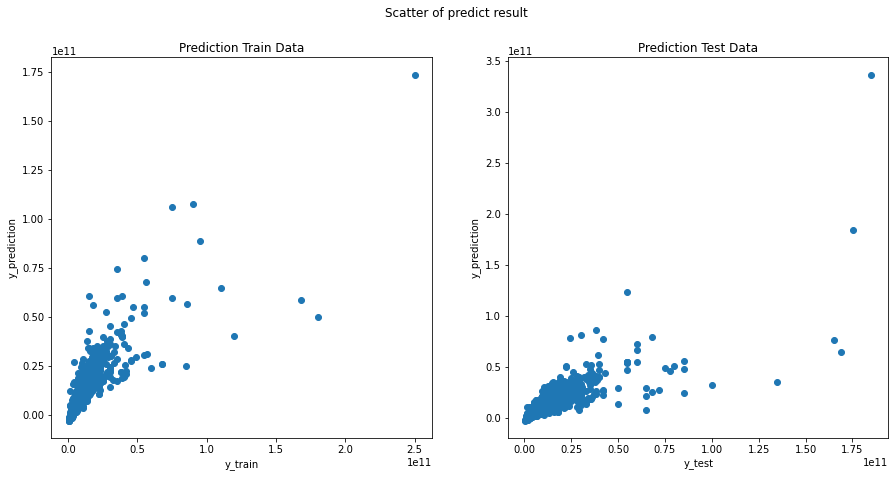

In [27]:
import matplotlib.pyplot as plt
fig, (x1, x2) = plt.subplots(1, 2, figsize = (15, 7))
fig.suptitle('Scatter of predict result')
x1.scatter(y_train, predict_train)
x1.set_title('Prediction Train Data')
x1.set_ylabel('y_prediction')
x1.set_xlabel('y_train')
x2.scatter(y_test, predict_test)
x2.set_title('Prediction Test Data')
x2.set_ylabel('y_prediction')
x2.set_xlabel('y_test')
plt.show()

In [28]:
import pickle

In [29]:
filename = "model.sav"
pickle.dump(model, open(filename, 'wb'))